<a href="https://colab.research.google.com/github/briland/gan-tutorial/blob/main/playing_with_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# &#129504; A Brief Introduction to Generative Adversarial Networks, a.k.a. `GANs`

## &#9776; Import the necessary libraries

In [1]:
import os
import sys
import torch
import numpy as np
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
import warnings

## &#9997; Configuration

In [2]:
warnings.filterwarnings('ignore')

In [3]:
torch.manual_seed(100)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

## &#9881; Function definition

In [5]:
def load_pretrained_gan_model(repository, gan_architecture, model_name, use_gpu):
    """Load pretrained GAN models from Facebook Research GAN Zoo repository"""
    if gan_architecture == 'DCGAN':
        pretrained_gan_model = torch.hub.load(repository, 
                                              gan_architecture, 
                                              pretrained=True, 
                                              useGPU=use_gpu)
    elif gan_architecture == 'PGAN':
        pretrained_gan_model = torch.hub.load(repository, 
                                              gan_architecture, 
                                              model_name=model_name, 
                                              pretrained=True, 
                                              useGPU=use_gpu)
    else:
        print(f"GAN Model: {gan_architecture} does not exist1")
        exit()
    
    return pretrained_gan_model

In [6]:
def generate_samples(pretrained_gan_model, number_of_samples):
    """Generate samples from the pretrained GAN model"""
    
    noise, _ = pretrained_gan_model.buildNoiseData(number_of_samples)

    with torch.no_grad():
        generated_samples = pretrained_gan_model.test(noise)

    return generated_samples

In [7]:
def visualize_samples(gan_architecture, generated_samples, title):
    """Display the GAN generated samples"""

    if gan_architecture == 'DCGAN':
        grid = torchvision.utils.make_grid(generated_samples)
    elif gan_architecture == 'PGAN':
        grid = torchvision.utils.make_grid(generated_samples.clamp(min=-1, max=1), scale_each=True, normalize=True)
    else:
        print(f"GAN Model: {gan_architecture} does not exist!")
        exit()

    plt.figure(figsize = (20,20))
    plt.title(title)
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())

## &#128640; Parameters

In [8]:
REPOSITORY = "facebookresearch/pytorch_GAN_zoo:hub"
GAN_ARCHITECTURE = "PGAN" # options = ['DCGAN', 'PGAN']
MODEL_NAME = "celebAHQ-256" # options = ['celebAHQ-256', 'celebAHQ-512', 'DTD', 'celeba']
USE_GPU = False if device.type == 'cpu' else True
NUMBER_OF_SAMPLES = 16

## &#129514; Generate Image Samples

### &#129302; DCGAN

In [9]:
gan_model = load_pretrained_gan_model(repository=REPOSITORY, 
                                      gan_architecture='DCGAN', 
                                      model_name='', 
                                      use_gpu=USE_GPU)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


In [10]:
synthesized_samples = generate_samples(pretrained_gan_model=gan_model, 
                                       number_of_samples=NUMBER_OF_SAMPLES)

In [11]:
synthesized_samples

tensor([[[[1.0000, 1.0000, 1.0000,  ..., 0.9973, 0.9985, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 0.9992, 0.9996, 0.9990],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9997],
          ...,
          [0.9999, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [0.9999, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 0.9962, 0.9983, 0.9950],
          [1.0000, 1.0000, 1.0000,  ..., 0.9994, 0.9993, 0.9990],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9996],
          ...,
          [0.9999, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

         [[1.0000, 1.0000, 1.0000,  ..., 0.9944, 0.9977, 0.9950],
          [1.0000, 1.0000, 1.0000,  ..., 0.9990, 0.9992, 0.9991],
          [1.0000, 1.0000, 1.0000,  ..., 1

In [12]:
type(synthesized_samples)

torch.Tensor

In [13]:
synthesized_samples.shape

torch.Size([16, 3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


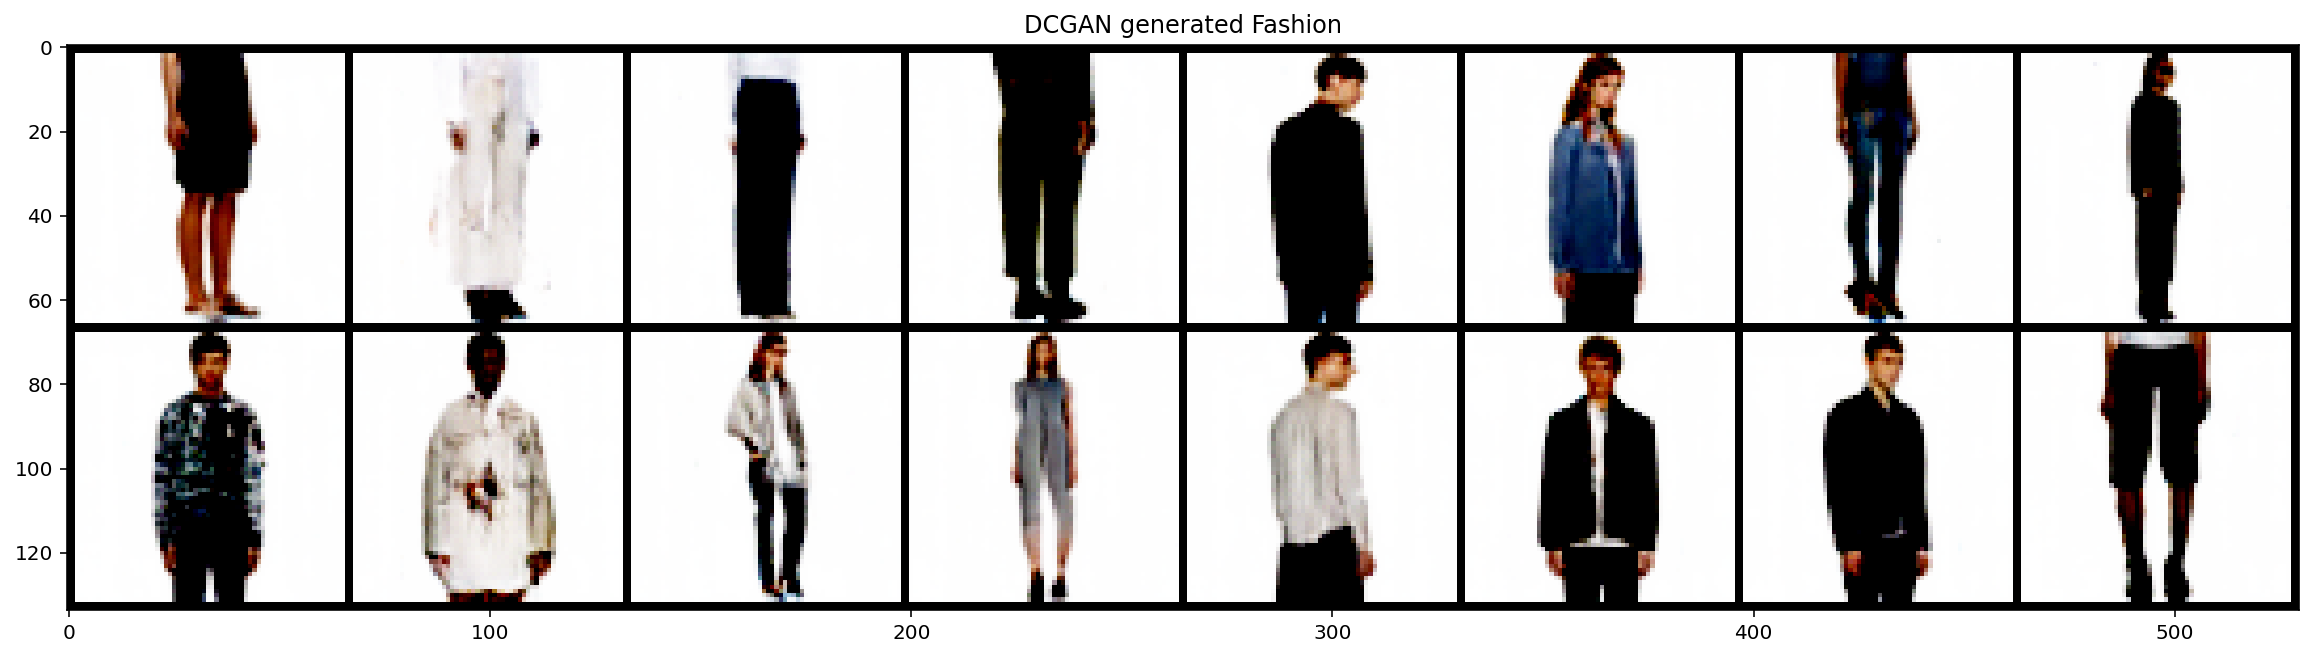

In [14]:
visualize_samples(gan_architecture='DCGAN', 
                  generated_samples=synthesized_samples, 
                  title='DCGAN generated Fashion')

### &#129312; PGAN

In [15]:
# gan_model = load_pretrained_gan_model(repository=REPOSITORY, 
#                                       gan_architecture=GAN_ARCHITECTURE, 
#                                       model_name='celebAHQ-512', 
#                                       use_gpu=USE_GPU)

gan_model = load_pretrained_gan_model(repository=REPOSITORY, 
                                      gan_architecture=GAN_ARCHITECTURE, 
                                      model_name=MODEL_NAME, 
                                      use_gpu=USE_GPU)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


In [16]:
synthesized_samples = generate_samples(pretrained_gan_model=gan_model, 
                                       number_of_samples=NUMBER_OF_SAMPLES)

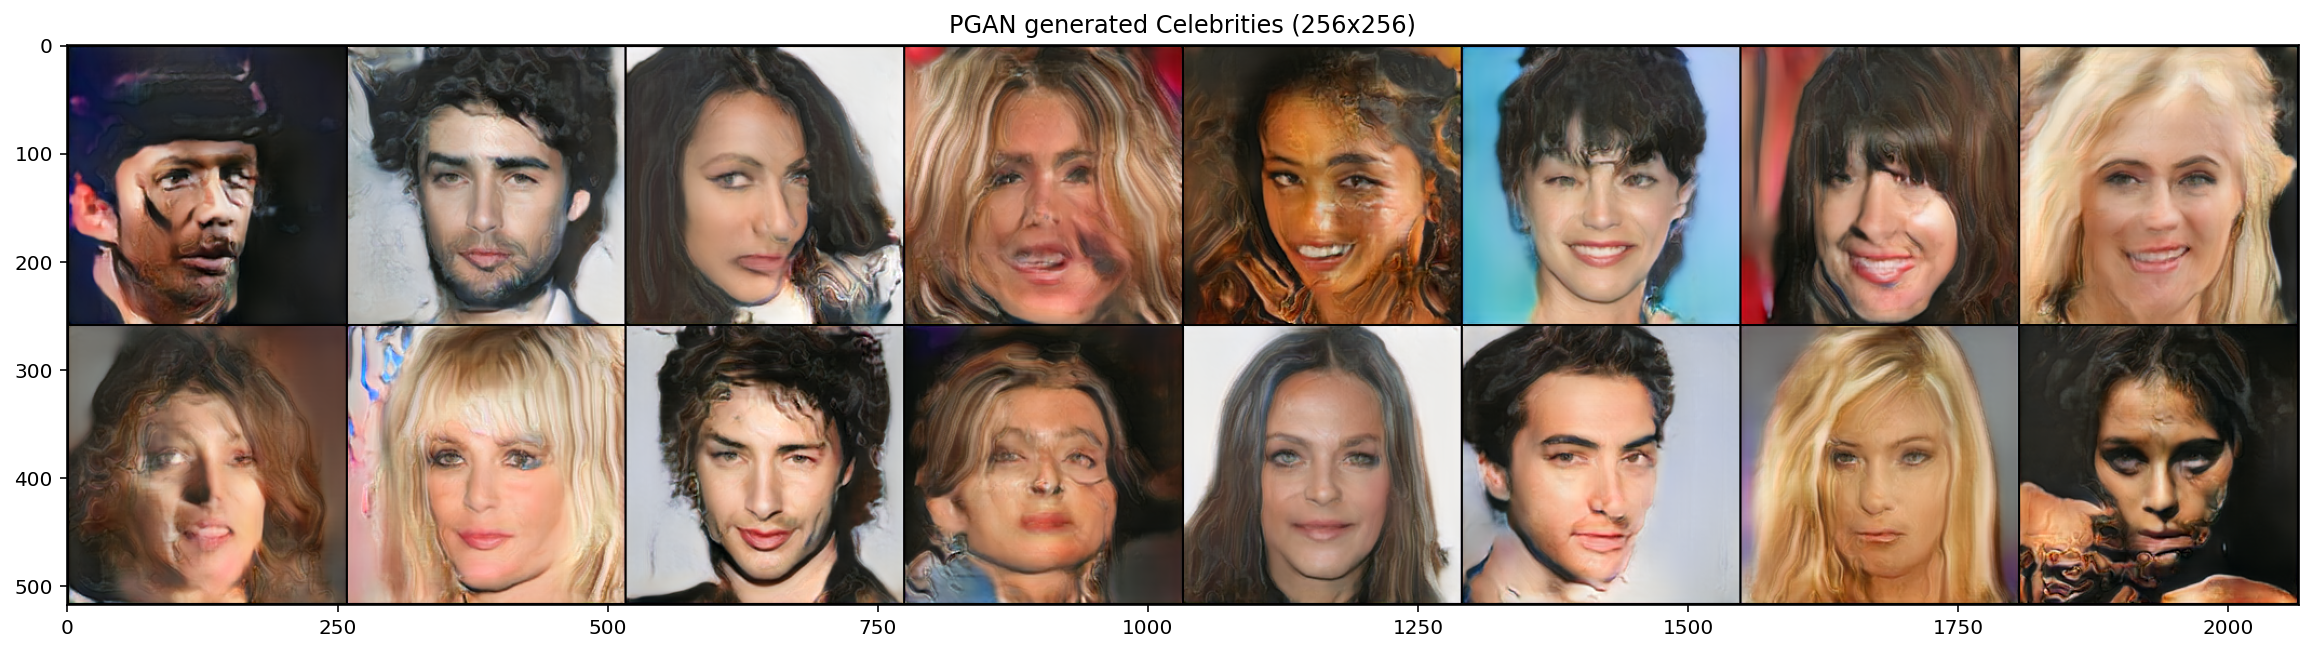

In [17]:
visualize_samples(gan_architecture=GAN_ARCHITECTURE, 
                  generated_samples=synthesized_samples, 
                  title="PGAN generated Celebrities (256x256)")

## &#128218; References and Resources

1. Pytorch GAN Zoo, Facebook Research, see [HERE](https://github.com/facebookresearch/pytorch_GAN_zoo)
2. Goodfellow, Ian, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, and Yoshua Bengio. **''Generative adversarial nets.''** *Advances in Neural Information Processing Systems*. (2014)., see [HERE](https://proceedings.neurips.cc/paper/2014/file/5ca3e9b122f61f8f06494c97b1afccf3-Paper.pdf)
3. Radford, Alec, Luke Metz, and Soumith Chintala. **''Unsupervised representation learning with deep convolutional generative adversarial networks.''** *International Conference on Learning Representations (ICLR)*. (2016)., see [HERE](https://arxiv.org/pdf/1511.06434.pdf)
4. Karras, Tero, Timo Aila, Samuli Laine, and Jaakko Lehtinen. **''Progressive growing of gans for improved quality, stability, and variation.''** *International Conference on Learning Representations (ICLR)*. (2018)., see [HERE](https://arxiv.org/pdf/1710.10196.pdf)
5. The GAN Zoo (GitHub repo), see [HERE](https://github.com/hindupuravinash/the-gan-zoo)

## &#10024; Acknowledgements

* Pytorch GAN Zoo, Facebook Research, see [HERE](https://github.com/facebookresearch/pytorch_GAN_zoo)
* PyTorch Hub for Researchers, see [HERE](https://pytorch.org/hub/research-models)